<a href="https://colab.research.google.com/github/flaviorosso/market-breadth-analysis/blob/main/Market_Breadth_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  96 of 96 completed
[*********************100%***********************]  1 of 1 completed


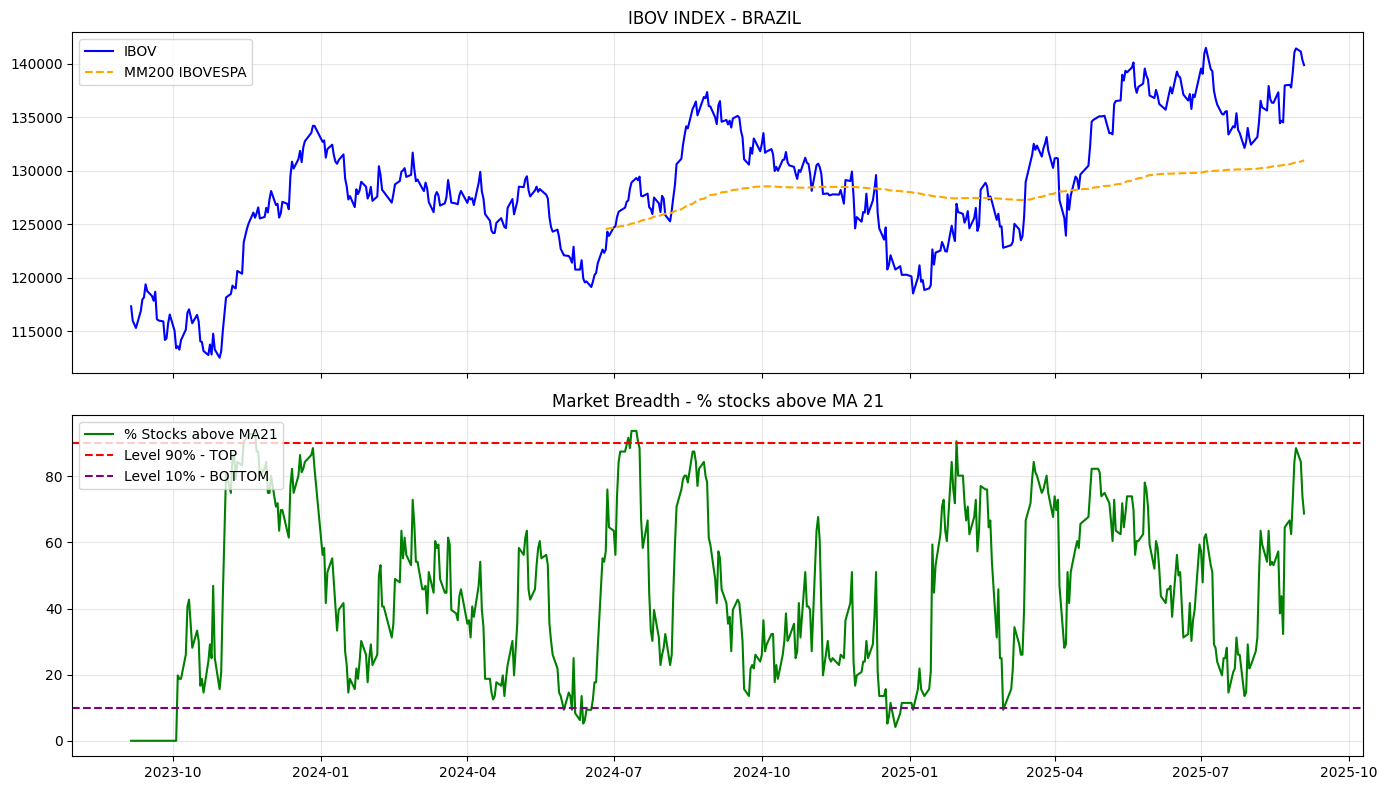

In [11]:
# Market Breadth index to analyse if the market is approaching TOP or BOTTOM
# First experiment IBOVESPA B3 Brasil market

# --- Market Breadth IBOVESPA ---
# Flavio Rosso | Base para projeto no GitHub

!pip install yfinance --quiet

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# ------------------------------
# Parâmetros
# ------------------------------
start = (dt.datetime.today() - dt.timedelta(days=730)).strftime("%Y-%m-%d")  # últimos 2 anos
end = dt.datetime.today().strftime("%Y-%m-%d")

moving_avg_days = 21   # média móvel curta (parametrizável)
index_symbol = "^BVSP" # IBOVESPA
# Lista completa de ativos do IBOVESPA (formato yfinance com .SA)
stocks = [
    "ABEV3.SA","ALOS3.SA","ALPA4.SA","AZZA3.SA","ASAI3.SA","AURE3.SA","AZUL4.SA",
    "B3SA3.SA","BBAS3.SA","BBDC3.SA","BBDC4.SA","BBSE3.SA","BEEF3.SA","BHIA3.SA",
    "BOVA11.SA","BPAC11.SA","BRAP4.SA","BRFS3.SA","BRKM5.SA","CASH3.SA","CBAV3.SA",
    "MOTV3.SA","CMIG4.SA","CMIN3.SA","COGN3.SA","CPFE3.SA","CPLE6.SA","CSAN3.SA",
    "CSMG3.SA","CSNA3.SA","CVCB3.SA","CYRE3.SA","DIRR3.SA","DXCO3.SA","ECOR3.SA",
    "EGIE3.SA","ELET3.SA","ELET6.SA","EMBR3.SA","ENEV3.SA","ENGI11.SA","EQTL3.SA",
    "EZTC3.SA","FLRY3.SA","GGBR4.SA","GMAT3.SA","GOAU4.SA","HAPV3.SA","HYPE3.SA",
    "IGTI11.SA","IRBR3.SA","ITSA4.SA","ITUB4.SA","KLBN11.SA","LREN3.SA","LWSA3.SA",
    "MDIA3.SA","MGLU3.SA","MOVI3.SA","MRFG3.SA","MRVE3.SA","MULT3.SA","PCAR3.SA",
    "PETR3.SA","PETR4.SA","PETZ3.SA","PRIO3.SA","PSSA3.SA","RADL3.SA",
    "RAIL3.SA","RAIZ4.SA","RDOR3.SA","RECV3.SA","RENT3.SA","BRAV3.SA","SANB11.SA",
    "SBSP3.SA","SIMH3.SA","SLCE3.SA","SMAL11.SA","SMTO3.SA","STBP3.SA","SUZB3.SA",
    "TAEE11.SA","TIMS3.SA","TOTS3.SA","ISAE4.SA","UGPA3.SA","USIM5.SA","VALE3.SA",
    "VAMO3.SA","VBBR3.SA","VIVA3.SA","VIVT3.SA","WEGE3.SA","YDUQ3.SA"
]

# Obs: lista reduzida de ações do IBOVESPA (pode expandir se quiser)

# ------------------------------
# Download dos dados
# ------------------------------
data = yf.download(stocks, start=start, end=end, auto_adjust=False)["Close"]
index_data = yf.download(index_symbol, start=start, end=end, auto_adjust=False)["Close"]

# ------------------------------
# Cálculo das médias móveis e breadth
# ------------------------------
mm = data.rolling(window=moving_avg_days).mean()

# Sinal: 1 se preço > média móvel, 0 caso contrário
signals = (data > mm).astype(int)

# Indicador breadth = % de ações acima da média
breadth = signals.mean(axis=1) * 100

# IBOVESPA com MM200
index_ma200 = index_data.rolling(window=200).mean()

# ------------------------------
# Plotagem
# ------------------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# --- Gráfico 1: IBOVESPA ---
ax1.plot(index_data, label="IBOV", color="blue")
ax1.plot(index_ma200, label="MM200 IBOVESPA", color="orange", linestyle="--")
ax1.set_title("IBOV INDEX - BRAZIL ")
ax1.legend()
ax1.grid(True, alpha=0.3)

# --- Gráfico 2: Breadth ---
ax2.plot(breadth, label=f"% Stocks above MA{moving_avg_days}", color="green")
ax2.axhline(90, color="red", linestyle="--", label="Level 90% - TOP ")
ax2.axhline(10, color="purple", linestyle="--", label="Level 10% - BOTTOM")
ax2.set_title(f"Market Breadth - % stocks above MA {moving_avg_days}")
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
